 This assignment aims to analyse BeeGeez’s sales dataset to gain insights into various products, 
regions and sales channels. The analysis will be conducted by leveraging Python programming in 
Google Colab notebooks, exploring SQLite databases, data visualisation, and applying industry best 
practices in programming


**Total revenue and profit generated by Product**
Analyse the total revenue and profit generated by each item type and then visualise the results sorted 
in descending order.

**Total revenue and profit generated by Region**
Analyse the total revenue and profit generated by region and then visualise the results in sorted order

**Identifying Top Revenue-Generating Products by Item Type and Sales Channel**
Analyse the sales data based on item type and sales channel to identify the products that generate 
the highest revenue both online and offline. Visualise the results using horizontal bars in either 
ascending or descending order




In [1]:
import sqlite3 #start by loading in the library

In [2]:
conn = sqlite3.connect('beegeez_sales_data.db') #use the connect method and pass the name of the database.

In [3]:
cur = conn.cursor() #create a cursor object

In [4]:
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cur.execute(sql)
cur.fetchall()
#use fetchall() function to return all the results.

[('sales',)]

In [5]:
import pandas as pd # use pandas package to read SQLite database

sql='''
SELECT * from sales;
'''
# Load the data into a DataFrame
df = pd.read_sql_query(sql, conn)
df

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02


In [6]:
subset_df = df[['Region', 'Item_Type','Sales_Channel','Total_Revenue','Total_Profit']]
subset_df #create subset to minimize columns

,Region,Item_Type,Sales_Channel,Total_Revenue,Total_Profit
0,Australia and Oceania,Baby Food,Offline,2533654.00,951410.50
1,Central America and the Caribbean,Cereal,Online,576782.80,248406.36
2,Europe,Office Supplies,Offline,1158502.59,224598.75
3,Sub-Saharan Africa,Fruits,Online,75591.66,19525.82
4,Sub-Saharan Africa,Office Supplies,Offline,3296425.02,639077.50
...,...,...,...,...,...
95,Sub-Saharan Africa,Clothes,Online,97040.64,65214.72
96,Asia,Fruits,Offline,58471.11,15103.47
97,Sub-Saharan Africa,Vegetables,Offline,228779.10,93748.05
98,North America,Personal Care,Offline,471336.91,144521.02


In [47]:
grouped1 = df.groupby(['Item_Type']).agg({'Total_Revenue': 'sum', 'Total_Profit': 'sum'})
print(grouped1) # group the data by item type, and calculate total revenue and total profit for each type

                 Total_Revenue  Total_Profit
Item_Type                                   
Baby Food          10350327.60    3886643.70
Beverages           2690794.60     888047.28
Cereal              5322898.90    2292443.43
Clothes             7787292.80    5233334.40
Cosmetics          36601509.60   14556048.66
Fruits               466481.34     120495.18
Household          29889712.29    7412605.71
Meat                4503675.75     610610.00
Office Supplies    30585380.07    5929583.75
Personal Care       3980904.84    1220622.48
Snacks              2080733.46     751944.18
Vegetables          3089057.06    1265819.63


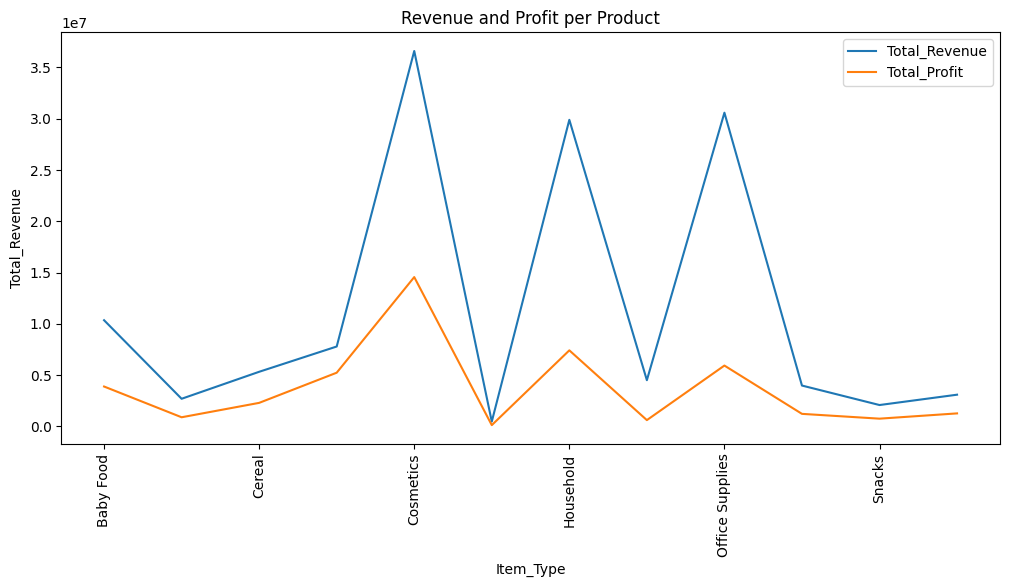

In [49]:
ax1.set_xlim(0,12)
ax1 = grouped1.plot(kind="line", figsize=(10, 5))
ax1.plot()
plt.tight_layout()
plt.xticks(rotation=90) 
ax1.set_xlabel("Item_Type")
ax1.set_ylabel("Total_Revenue")
ax2.set_xlabel("Item_Type")
ax2.set_ylabel("Total_Profit")
ax1.set_title("Revenue and Profit per Product")
plt.show() #plot and create line graph to present revenue and profit per product


Beegeez's sales show that the highest revenue generating product is from Cosmetics, followed by Office Supplies, then Household.
However in terms of profit, Household comes in second in front of Office Supplies. The Product with the least Revenue and Profit is Fruits.

In [50]:
grouped1 = df.groupby("Item_Type")["Total_Revenue"].sum().sort_values(ascending=False)
grouped1 # Get total revenue per item type and sort in descending order - highest to lowest

Item_Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total_Revenue, dtype: float64

In [51]:
grouped1 = df.groupby("Item_Type")["Total_Profit"].sum().sort_values(ascending=False)
grouped1 # Get total profit per item type and sort in descending order - highest to lowest

Item_Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total_Profit, dtype: float64

In [54]:
grouped2 = df.groupby(['Region']).agg({'Total_Revenue': 'sum', 'Total_Profit': 'sum'})
print(grouped2) # group the data by region, and calculate total revenue and total profit for each type

                                   Total_Revenue  Total_Profit
Region                                                        
Asia                                 21347091.02    6113845.87
Australia and Oceania                14094265.13    4722160.03
Central America and the Caribbean     9170385.49    2846907.85
Europe                               33368932.11   11082938.63
Middle East and North Africa         14052706.58    5761191.86
North America                         5643356.55    1457942.76
Sub-Saharan Africa                   39672031.43   12183211.40


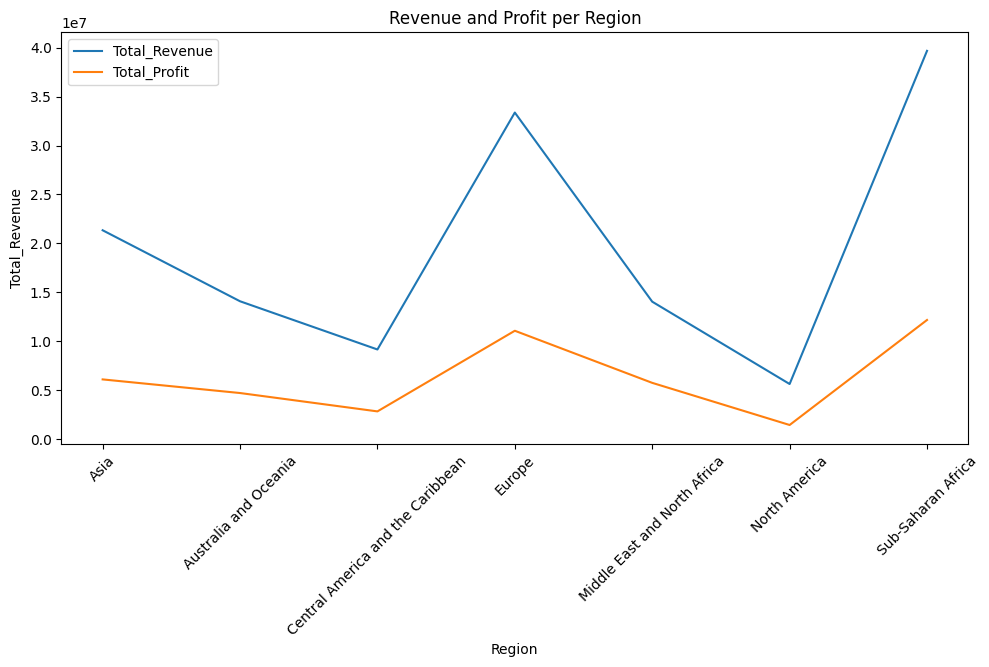

In [56]:
ax1.set_xlim(0,12)
ax1 = grouped2.plot(kind="line", figsize=(10, 5))
ax1.plot()
plt.tight_layout()
plt.xticks(rotation=45) 
ax1.set_xlabel("Region")
ax1.set_ylabel("Total_Revenue")
ax2.set_xlabel("Region")
ax2.set_ylabel("Total_Profit")
ax1.set_title("Revenue and Profit per Region")
plt.show() #plot and create line graph to present revenue and profit per region

Beegeez's sales show that the regions with the highest revenues and profits are Sub-Saharan Africa, Europe, then Asia. They have the least revenue and profits from North America. There is still a lot of room for improvement in the American Regions as it lags behind from the rest.



In [52]:
grouped2 = df.groupby("Region")["Total_Revenue"].sum().sort_values(ascending=False)
grouped2 # Get total revenue per region and sort in descending order - highest to lowest

Region
Sub-Saharan Africa                   39672031.43
Europe                               33368932.11
Asia                                 21347091.02
Australia and Oceania                14094265.13
Middle East and North Africa         14052706.58
Central America and the Caribbean     9170385.49
North America                         5643356.55
Name: Total_Revenue, dtype: float64

In [53]:
grouped2 = df.groupby("Region")["Total_Profit"].sum().sort_values(ascending=False)
grouped2 # Get total profit per region and sort in descending order - highest to lowest

Region
Sub-Saharan Africa                   12183211.40
Europe                               11082938.63
Asia                                  6113845.87
Middle East and North Africa          5761191.86
Australia and Oceania                 4722160.03
Central America and the Caribbean     2846907.85
North America                         1457942.76
Name: Total_Profit, dtype: float64

In [12]:
import pandas as pd
import matplotlib.pyplot as plt # import matplotlib library for plotting in graph
Online_Revenue = subset_df[(subset_df["Sales_Channel"] == "Online")] # filter dataframe to include Online sales channel only
Offline_Revenue = subset_df[(subset_df["Sales_Channel"] == "Offline")] # filter dataframe to include Offline sales channel only


In [13]:
grouped_Online = Online_Revenue.groupby("Item_Type")["Total_Revenue"].sum().sort_values(ascending=False)
grouped_Online # Get total revenue per item type in online group and sort in descending order - highest to lowest

Item_Type
Cosmetics          18348846.80
Office Supplies    17040863.28
Cereal              4549261.20
Meat                4503675.75
Baby Food           4198590.16
Clothes             3320909.92
Vegetables          2285326.04
Snacks              2080733.46
Beverages            717444.00
Personal Care        683099.34
Fruits               336757.02
Household            188452.14
Name: Total_Revenue, dtype: float64

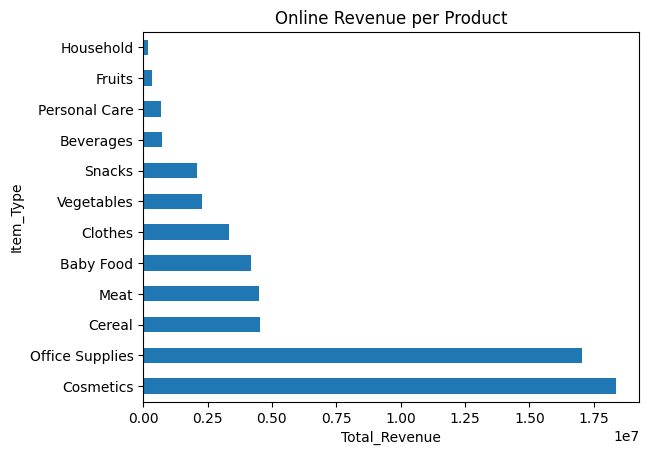

In [14]:
ax = grouped_Online.plot(kind="barh")
ax.set_xlabel("Total_Revenue")
ax.set_ylabel("Item_Type")
ax.set_title("Online Revenue per Product")
plt.show() #plot and create horizontal bar graph to present online revenue per product

Online Revenue is mainly coming from Cosmetics and Office Supplies. Household and fruits are the least popular in online sales.

In [15]:
grouped_Offline = Offline_Revenue.groupby("Item_Type")["Total_Revenue"].sum().sort_values(ascending=False)
grouped_Offline # Get total revenue per item type in offline group and sort in descending order - highest to lowest

Item_Type
Household          29701260.15
Cosmetics          18252662.80
Office Supplies    13544516.79
Baby Food           6151737.44
Clothes             4466382.88
Personal Care       3297805.50
Beverages           1973350.60
Vegetables           803731.02
Cereal               773637.70
Fruits               129724.32
Name: Total_Revenue, dtype: float64

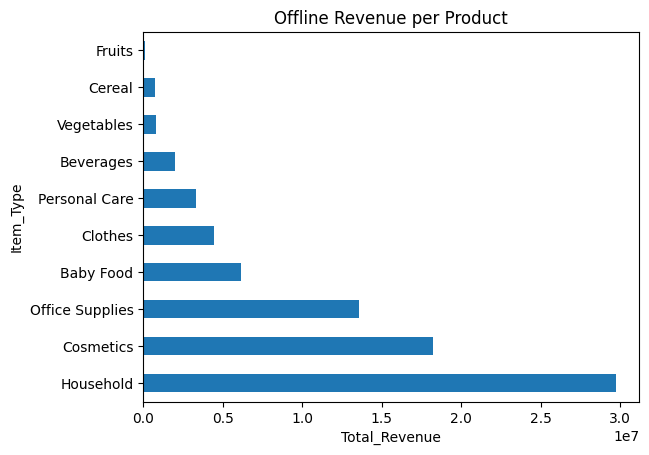

In [16]:
ax = grouped_Offline.plot(kind="barh")
ax.set_xlabel("Total_Revenue")
ax.set_ylabel("Item_Type")
ax.set_title("Offline Revenue per Product")
plt.show() #plot and create horizontal bar graph to present offline revenue per product

Top Offline Revenue coming from Househol, with Cosmetics and Office Supplies completing the top 3. The bottom revenue generating products for offline sales channel are Vegetables, Cereal and Fruits.

**Interpretation and Conclusion**

Beegeez's Sales History indicates that their top revenue generating product is coming from Cosmetics. Their cosmetics products is the highest in online sales and second in offline sales. They get the most profit from Cosmetics, Household, and Office Supplies. The Household product tops the offline revenues, but the last in online sales. Office Supplies is 2nd in online, and 3rd in offline revenue. Their least profitable products are Fruits, Meat, and Snacks. The Retail Company's top Regional performer is the Sub-Saharan Africa Region. This followed by Europe and Asia. The Americas (North, Central & Carribean) are the worst in terms of sales and profit.

**Limitations**

Conclusions are based only from the data that was reviewed and analyzed. Variables used were limited. Conclusions will be more accurate if all variables and factors were considered to analyze the sales data of the company.

**Python Notebooks**

Python Notebooks in general are functional and convenient. It is very user-friendly and easy to navigate. It effectively gives what the user requires. Codes are simple and easy to setup. With constant practice it can be highly functional wherein various tools can be used for data analysis, visualisation and presentation.